In [354]:
import torch
print(torch.__version__)

2.3.1+cpu


In [355]:
print(torch.cuda.is_available())

False


In [356]:
import urllib.request

In [357]:
url = "https://as1.ftcdn.net/v2/jpg/02/56/13/76/1000_F_256137677_dDeLDA2FrNIIr9XUKgmolrhKYW1oP8Gt.jpg"

In [358]:
file_name = "predict.jpg"

In [359]:
urllib.request.urlretrieve(url, file_name)

('predict.jpg', <http.client.HTTPMessage at 0x1e2bd9e7e10>)

In [360]:
import matplotlib.pyplot as plt
from PIL import Image

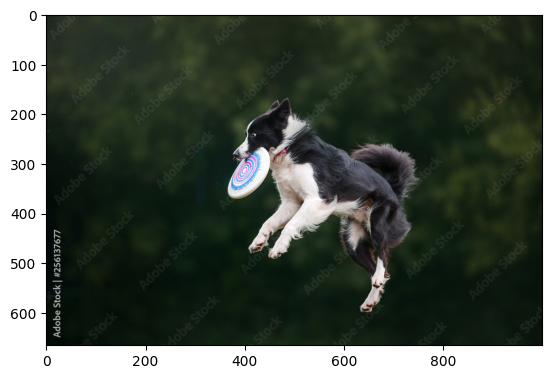

In [361]:
img = Image.open("predict.jpg")
plt.imshow(img)

In [362]:
from torchvision import transforms

In [363]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [364]:
img_tensor = transform(img)

In [365]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

In [366]:
preprocessed_img_tensor = preprocess(img_tensor)

In [367]:
preprocessed_img_tensor.shape  # There is a 3 for RGB, 224x224

torch.Size([3, 224, 224])

In [368]:
batch = preprocessed_img_tensor.unsqueeze(0)

In [369]:
batch.shape  # 1 batch, 3 dimension RGB, 224x224

torch.Size([1, 3, 224, 224])

In [370]:
from torchvision import models

In [371]:
model = models.alexnet(pretrained=True)

In [372]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [373]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [374]:
y = model(batch.to(device))

In [375]:
y.shape  # 1 batch, 1000 class for predict

torch.Size([1, 1000])

In [376]:
y_max, index = torch.max(y, 1)
index_value = index.item()
print(index_value)
print(type(index))
print(index, y_max)

232
<class 'torch.Tensor'>
tensor([232]) tensor([10.1115], grad_fn=<MaxBackward0>)


In [377]:
url = "http://pytorch.tips/imagenet-labels"

In [378]:
fname = "imagenet_class_labels.txt"

In [379]:
urllib.request.urlretrieve(url, fname)

('imagenet_class_labels.txt', <http.client.HTTPMessage at 0x1e2bdaad950>)

In [380]:
with open("imagenet_class_labels.txt") as f:
    classes = [line.strip() for line in f.readlines()]

In [381]:
print(classes[index_value])

232: 'Border collie',


In [382]:
prob = torch.nn.functional.softmax(y, dim=1)[0]*100
print(prob)

tensor([1.2094e-05, 9.1596e-04, 9.8628e-04, 1.1141e-03, 2.3805e-03, 7.6469e-04,
        1.9595e-04, 1.7269e-02, 8.2382e-03, 5.5535e-02, 1.3436e-03, 2.4047e-02,
        1.5427e-04, 1.7211e-02, 5.3629e-04, 1.2880e-03, 3.1497e-01, 2.8291e-02,
        1.3708e+00, 1.8638e+00, 4.3776e-02, 4.9784e-02, 3.5741e-03, 1.3765e-02,
        3.2165e-03, 2.7885e-04, 5.5853e-04, 1.5090e-04, 2.0405e-04, 1.0282e-03,
        1.0505e-03, 1.0720e-02, 6.0274e-03, 6.1878e-03, 5.0966e-03, 4.6737e-04,
        4.8349e-02, 4.2505e-05, 3.8907e-03, 7.9522e-04, 8.0908e-04, 4.4969e-03,
        1.8944e-04, 2.4875e-04, 3.0658e-04, 4.2815e-05, 1.6696e-03, 1.9848e-04,
        3.7758e-04, 5.7202e-04, 2.3192e-03, 5.0604e-04, 5.5987e-04, 2.4540e-03,
        3.7715e-04, 7.7170e-04, 1.2495e-02, 7.6982e-04, 2.1973e-03, 4.9572e-03,
        4.3081e-03, 6.4293e-04, 4.7193e-04, 7.3642e-04, 2.7881e-04, 3.4858e-02,
        5.6435e-04, 1.4966e-03, 9.4684e-04, 5.0215e-06, 4.3036e-05, 4.5085e-04,
        4.0652e-04, 2.5953e-03, 1.5944e-

In [383]:
print(classes[index[0]], prob[index[0]].item())

232: 'Border collie', 23.630033493041992


In [384]:
_, indeces = torch.sort(y, descending=True)

In [385]:
for idx in indeces[0][:5]:
    print(classes[idx], prob[idx].item())

232: 'Border collie', 23.630033493041992
217: 'English springer, English springer spaniel', 7.991372108459473
176: 'Saluki, gazelle hound', 5.918837547302246
231: 'collie', 5.379868507385254
195: 'Boston bull, Boston terrier', 3.7559683322906494
